In [8]:
import numpy as np
import torch
import os

from pathlib import Path
from tqdne.utils import *
from tqdne.conf import Config

In [2]:
dataset_folder = "../outputs/"
model_path_str = dataset_folder + "ddim-pred:sample-1D-downsampling:2_SignalWithEnvelope-moving_average_shifted-log-log_offset:1.0e-05-normalize-scalar:True"

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    torch.cuda.empty_cache()
else: 
    device = torch.device('cpu')

torch.cuda.is_available(), device

(True, device(type='cuda'))

2024-04-26 16:06:47 - root - INFO - Last checkpoint is : ../outputs/ddim-pred:sample-1D-downsampling:2_SignalWithEnvelope-moving_average_shifted-log-log_offset:1.0e-05-normalize-scalar:True/name=0_epoch=143-val_loss=0.02.ckpt
/users/abosisio/miniforge3/envs/tqdne/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'net' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['net'])`.


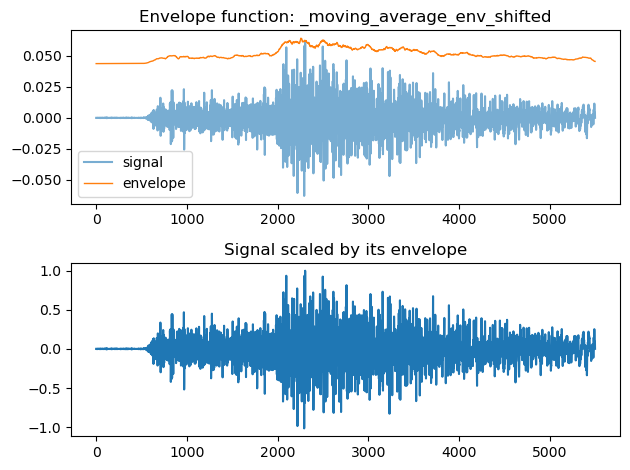

Model: LightningDiffusion
Number of learnable parameters: 9704198
Model size: 117.02 MB
UNet scheme: 
 base num. channels: 32 
 channel multipliers (down/up blocks): (1, 2, 4, 8) 
 num. ResBlocks per down/up block: 2 
 use Attention: True 
 conv. kernel size: 5 
Diffusion prediction type: sample
Learning rate schedule: 
 start: 0.0003 
 scheduler: cosine 
 warmup steps: 500
Batch size: 128
Downsampling factor: 2. The model was trained on signals with length 2736, as the sampling rate used was 50 instead of 100
Data representation shape: (1, 6, 5472) (batch_size, channels, signal_length)
Data representation name: SignalWithEnvelope
ckpt file: ../outputs/ddim-pred:sample-1D-downsampling:2_SignalWithEnvelope-moving_average_shifted-log-log_offset:1.0e-05-normalize-scalar:True/name=0_epoch=143-val_loss=0.02.ckpt


In [4]:
model, model_data_repr, ckpt = load_model(Path(model_path_str), use_ddim=False)
model.to(device)
model.eval()
print_model_info(model, model_data_repr, ckpt)

In [10]:
config = Config() 
if "downsampling" in model_path_str:
    downsampling = int(model_path_str.split("downsampling:")[1].split("_")[0])
    config.signal_length = config.signal_length // downsampling
    config.fs = config.fs // downsampling
    print(f"Updated signal length: {config.signal_length} and fs: {config.fs}")
else:
    downsampling = 1    

Updated signal length: 2736 and fs: 50


## Norcia

In [11]:
data_path = "/users/abosisio/scratch/tqdne/datasets/Norcia_distance_vs30.csv"

data = np.genfromtxt(data_path, delimiter=',', skip_header=1, usecols=(-1, -2))
data = data[~np.isnan(data).any(axis=1)]
data.shape

(471, 2)

In [12]:
mag = 6.5
is_shallow_crustal = 1.

In [13]:
cond_input = np.array([
    data[:, -2], 
    is_shallow_crustal * np.ones(data.shape[0]),
    mag * np.ones(data.shape[0]),
    data[:, -1]
]).T

cond_input.shape

(471, 4)

In [14]:
gen_data = generate_data(model, model_data_repr, raw_output=False, cond_input=cond_input, num_samples=20*cond_input.shape[0], device=device, max_batch_size=model.hparams.optimizer_params.batch_size)
gen_data.shape

Batch 1/73


100%|██████████| 100/100 [00:50<00:00,  1.97it/s]


Batch 2/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 3/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 4/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 5/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 6/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 7/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 8/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 9/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 10/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 11/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 12/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 13/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 14/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 15/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 16/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 17/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 18/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 19/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 20/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 21/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 22/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 23/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 24/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 25/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 26/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 27/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 28/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 29/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 30/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 31/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 32/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 33/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 34/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 35/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 36/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 37/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 38/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 39/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 40/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 41/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 42/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 43/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 44/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 45/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 46/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 47/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 48/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 49/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 50/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 51/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 52/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 53/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 54/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 55/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 56/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 57/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 58/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 59/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 60/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 61/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 62/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 63/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 64/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 65/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 66/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 67/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 68/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 69/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 70/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 71/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 72/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 73/73


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


Batch 74/73


100%|██████████| 100/100 [00:16<00:00,  6.11it/s]


AttributeError: 'dict' object has no attribute 'shape'

In [15]:
import pickle
with open(dataset_folder + 'norcia_gm0-mov-avg-shifted.pkl', 'wb') as f:
    pickle.dump(gen_data, f)

In [16]:
import pickle
with open(dataset_folder + 'norcia_gm0-mov-avg-shifted.pkl', 'rb') as f:
    norcia_data_gen = pickle.load(f)
    print(norcia_data_gen['waveforms'].shape, norcia_data_gen['cond'].shape)

(9420, 3, 2736) (9420, 4)


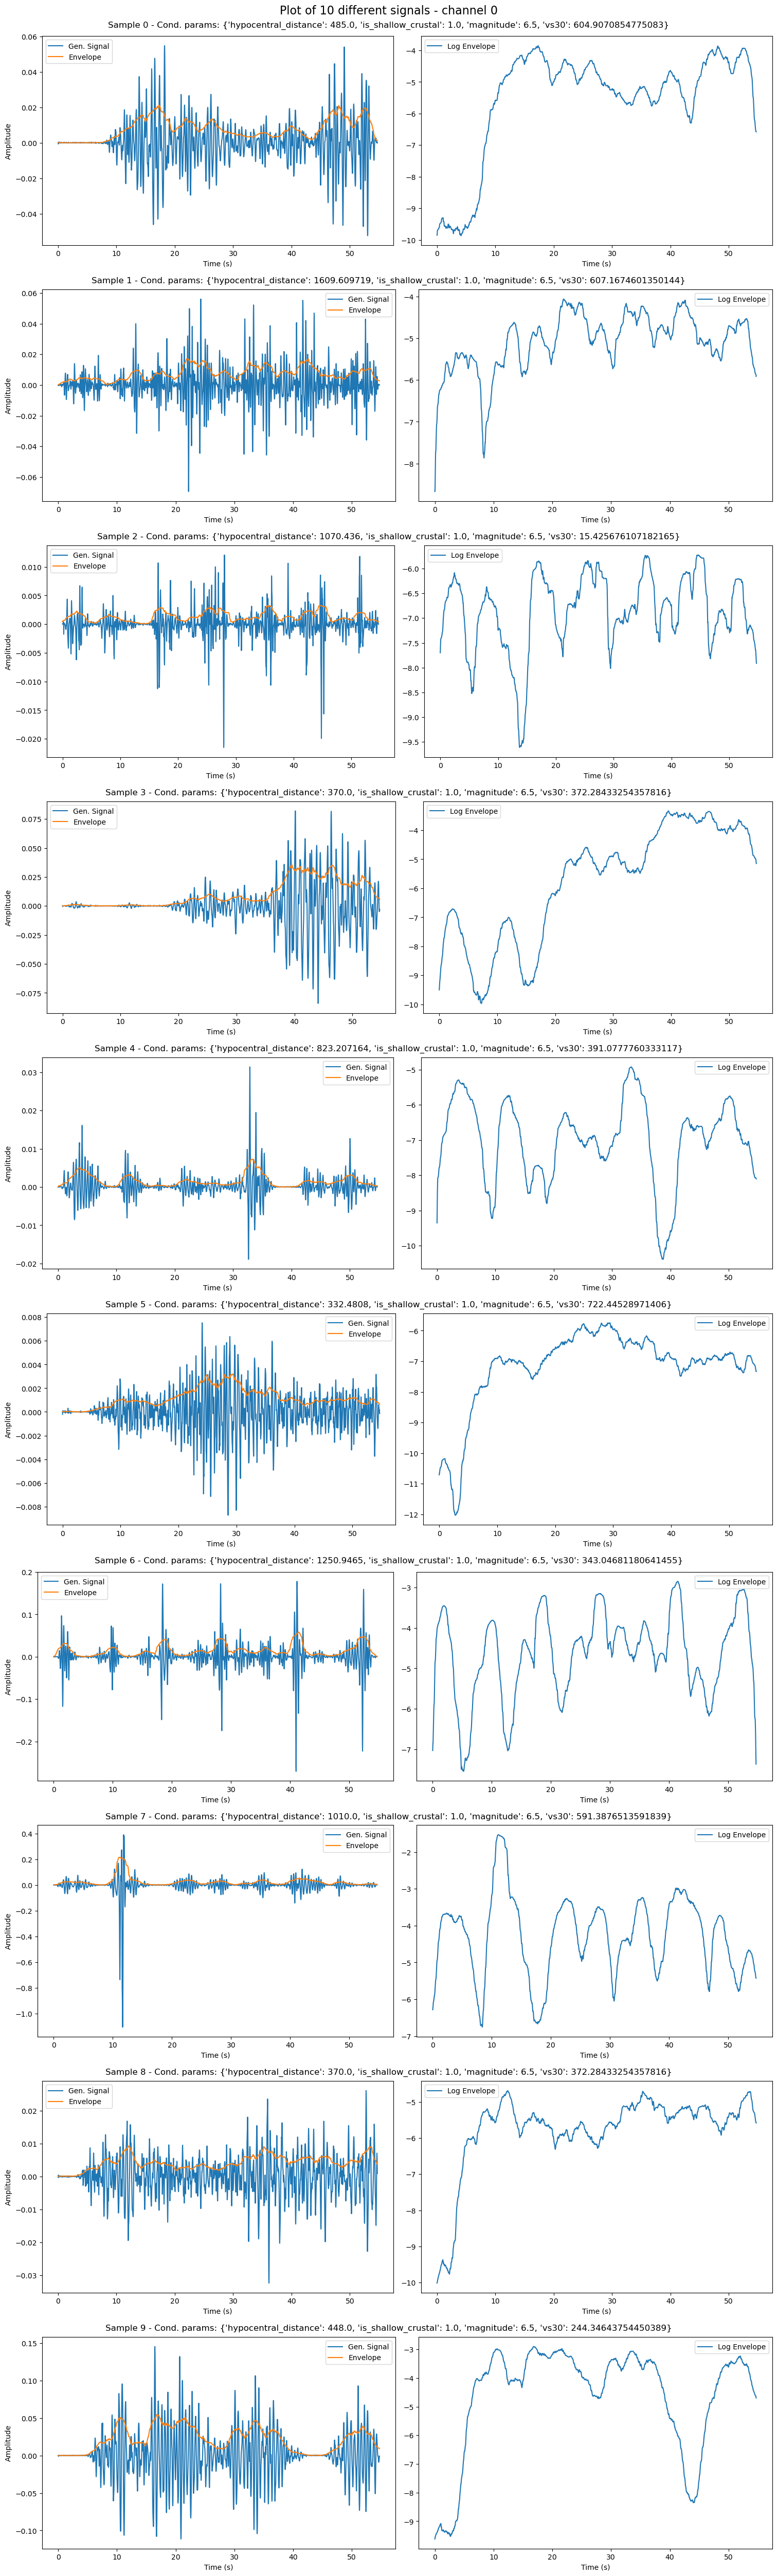

In [17]:
plot_waveforms(get_samples(norcia_data_gen, num_samples=10))

## Amatrice

In [18]:
data_path = "/users/abosisio/scratch/tqdne/datasets/Amatrice_distance_vs30.csv"

data = np.genfromtxt(data_path, delimiter=',', skip_header=1, usecols=(-1, -2))
data = data[~np.isnan(data).any(axis=1)]
data.shape

(430, 2)

In [19]:
mag = 6.0
is_shallow_crustal = 1.

In [20]:
cond_input = np.array([
    data[:, -2], 
    is_shallow_crustal * np.ones(data.shape[0]),
    mag * np.ones(data.shape[0]),
    data[:, -1]
]).T

cond_input.shape

(430, 4)

In [21]:
gen_data = generate_data(model, model_data_repr, raw_output=False, cond_input=cond_input, num_samples=20*cond_input.shape[0], device=device, max_batch_size=model.hparams.optimizer_params.batch_size*2)

Batch 1/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 2/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 3/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 4/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 5/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 6/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 7/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 8/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 9/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 10/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 11/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 12/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 13/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 14/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 15/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 16/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 17/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 18/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 19/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 20/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 21/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 22/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 23/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 24/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 25/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 26/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 27/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 28/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 29/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 30/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 31/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 32/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 33/33


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


Batch 34/33


100%|██████████| 100/100 [00:29<00:00,  3.45it/s]


In [22]:
import pickle
with open(dataset_folder + 'amatrice_gm0-mov-avg-shifted.pkl', 'wb') as f:
    pickle.dump(gen_data, f)

In [23]:
import pickle
with open(dataset_folder + 'amatrice_gm0-mov-avg-shifted.pkl', 'rb') as f:
    amatrice_data_gen = pickle.load(f)
    print(amatrice_data_gen['waveforms'].shape, amatrice_data_gen['cond'].shape)

(8600, 3, 2736) (8600, 4)


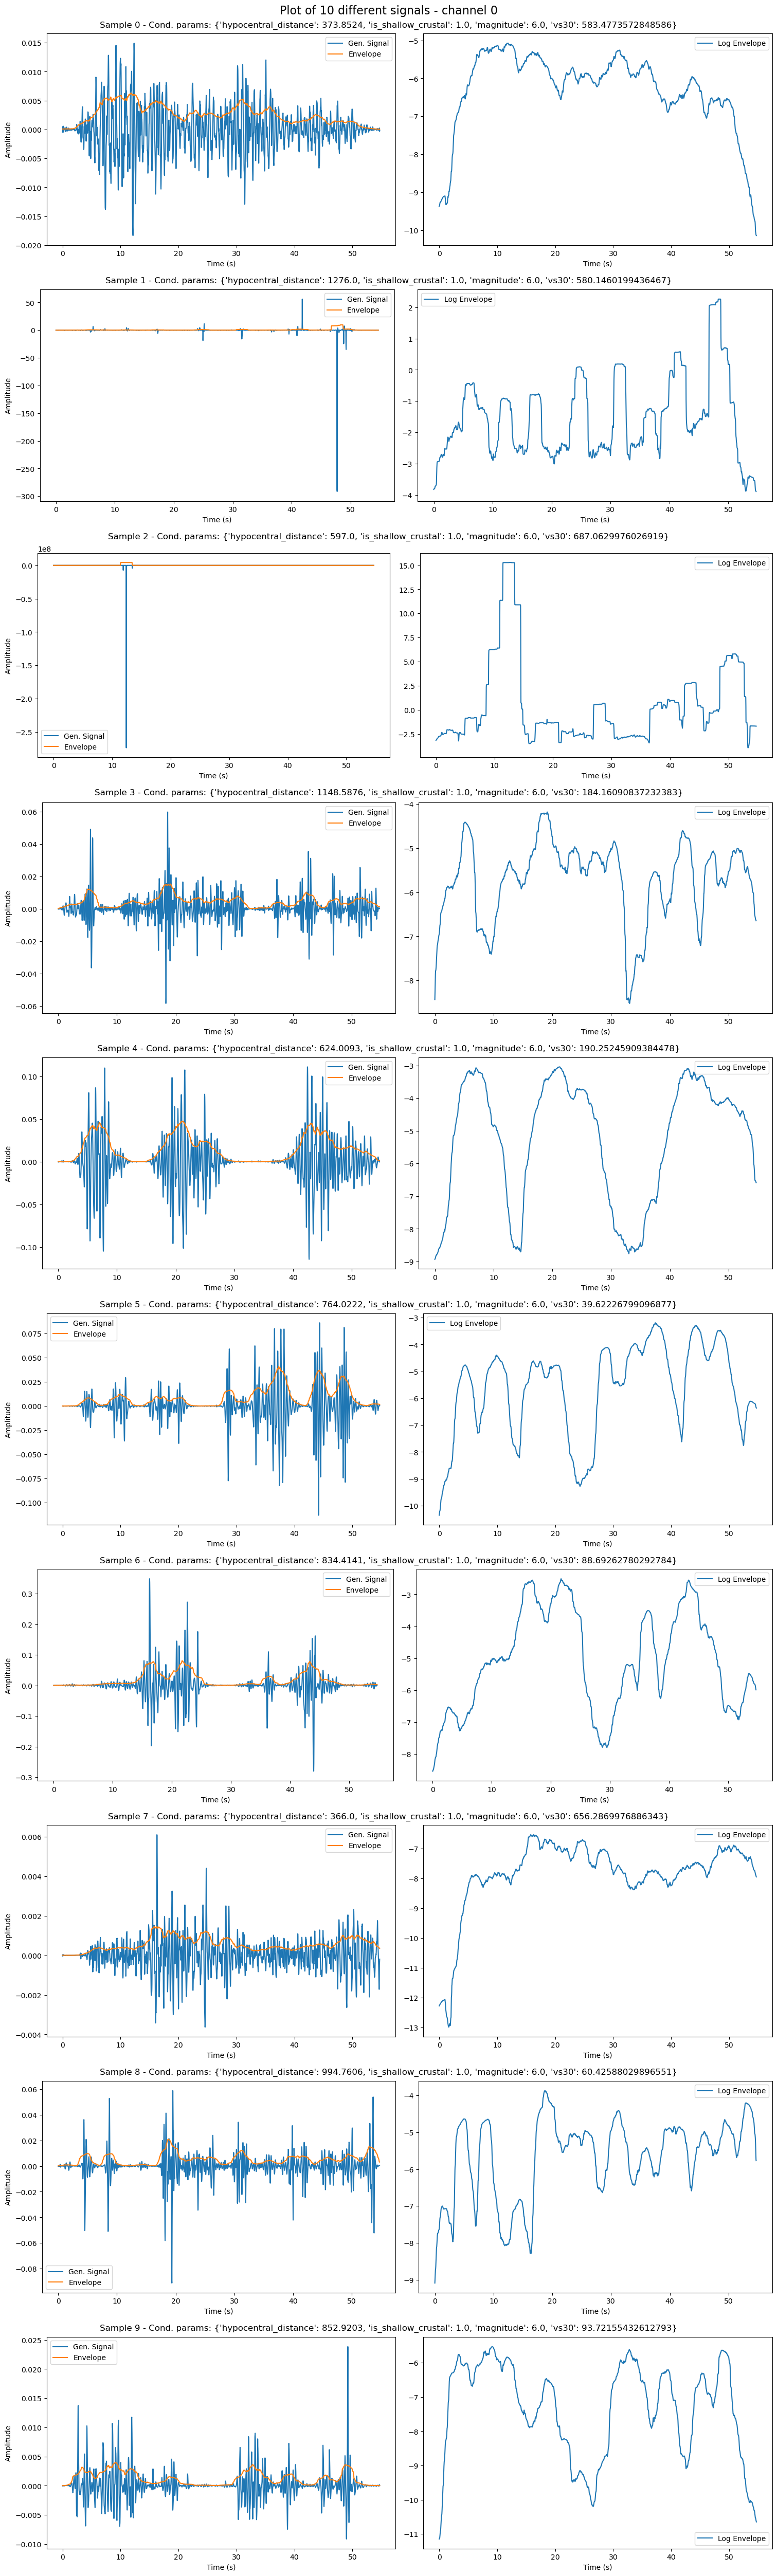

In [24]:
plot_waveforms(get_samples(amatrice_data_gen, num_samples=10))